In [2]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import os

In [3]:
def read_csv(filepath):
    data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
    polylines_dict = {}

    for row in data:
        polyline_id = int(row[0])
        x = row[2]
        y = row[3]
        
        if polyline_id not in polylines_dict:
            polylines_dict[polyline_id] = []
        
        polylines_dict[polyline_id].append((x, y))

    
    polylines = [np.array(points) for points in polylines_dict.values()]
    return polylines


In [4]:
def plot_all_polylines(polylines):
    fig, ax = plt.subplots(figsize=(9, 9))
    
    cmap = plt.get_cmap('tab10')  
    num_colors = len(polylines)
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    for polyline, color in zip(polylines, colors):
        ax.plot(polyline[:, 0], polyline[:, 1], marker='o', linewidth=2, color=color)
    
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Polylines Plot with Distinct Colors')
    plt.grid(True)
    plt.show()

In [5]:
def plot_individual_polylines(polylines):
    cmap = plt.get_cmap('tab10')  
    num_colors = len(polylines)
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    for idx, (polyline, color) in enumerate(zip(polylines, colors)):
        fig, ax = plt.subplots(figsize=(9, 9))
        ax.plot(polyline[:, 0], polyline[:, 1], marker='o', linewidth=2, color=color)
        
        ax.set_aspect('equal')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title(f'Polyline {idx + 1} Plot')
        plt.grid(True)
        plt.show()

In [6]:
def polylines_to_svg(paths_XYs, svg_path):
    dwg = svgwrite.Drawing(svg_path, profile='tiny')
    for path_XYs in paths_XYs:
        # Create SVG path data from the points
        path_data = "M " + " L ".join([f"{x},{y}" for x, y in path_XYs])
        dwg.add(dwg.path(d=path_data, fill='none', stroke='black', stroke_width=2))
    dwg.save()


In [7]:
import numpy as np

def is_mirror_symmetric(polyline):
    """ Check if a polyline is symmetric as a mirror image about a vertical line """
    if len(polyline) < 2:
        return False
    
    # Compute the centroid of the polyline
    centroid_x = np.mean(polyline[:, 0])
    
    # Split polyline into two halves based on the vertical line of symmetry
    left_half = polyline[polyline[:, 0] <= centroid_x]
    right_half = polyline[polyline[:, 0] > centroid_x]
    
    # Reflect right half over the vertical line at centroid_x
    reflected_right_half = right_half.copy()
    reflected_right_half[:, 0] = 2 * centroid_x - reflected_right_half[:, 0]
    
    # Sort both halves by y coordinate (and x coordinate if necessary) to match corresponding points
    left_half = left_half[np.argsort(left_half[:, 1])]
    reflected_right_half = reflected_right_half[np.argsort(reflected_right_half[:, 1])]
    
    # Ensure both halves have the same length before comparison
    min_length = min(len(left_half), len(reflected_right_half))
    if min_length == 0:
        return False
    
    # Truncate to the minimum length
    left_half = left_half[:min_length]
    reflected_right_half = reflected_right_half[:min_length]
    
    # Check if the left half and reflected right half are close
    return np.allclose(left_half, reflected_right_half, atol=1e-2)



In [8]:
import matplotlib.pyplot as plt

def plot_and_check_mirror_symmetry(polylines):
    cmap = plt.get_cmap('tab10')  
    num_colors = len(polylines)
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    results = []
    
    for idx, (polyline, color) in enumerate(zip(polylines, colors)):
        fig, ax = plt.subplots(figsize=(9, 9))
        ax.plot(polyline[:, 0], polyline[:, 1], marker='o', linewidth=2, color=color)
        
        
        symmetric = is_mirror_symmetric(polyline)
        
        ax.set_aspect('equal')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title(f'Polyline {idx + 1} - Mirror Symmetric: {symmetric}')
        plt.grid(True)
        plt.show()
        
        results.append((polyline, symmetric))
    
    return results




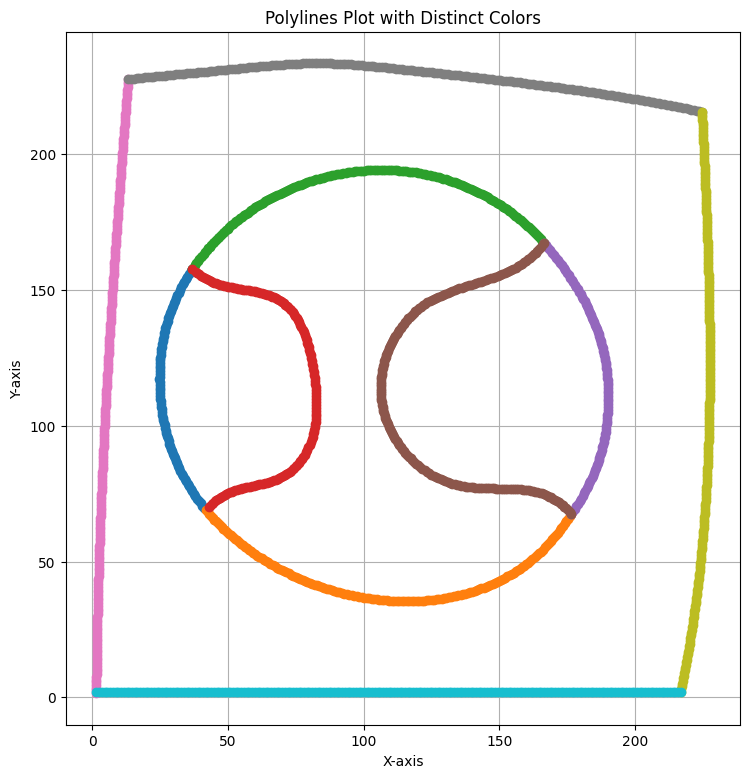

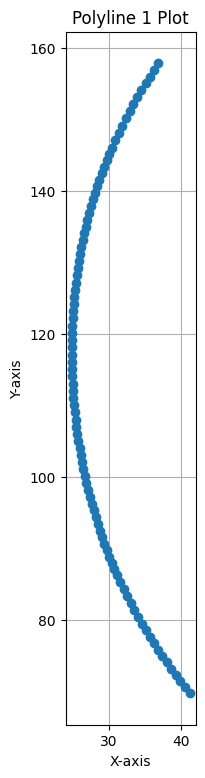

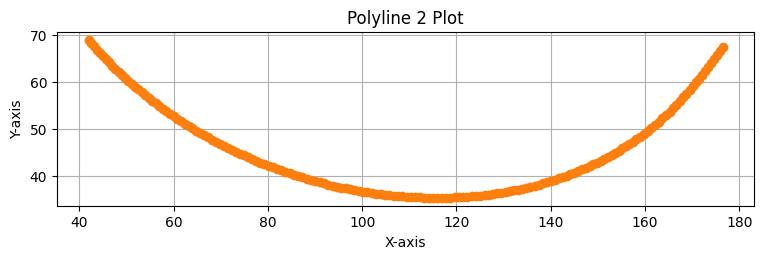

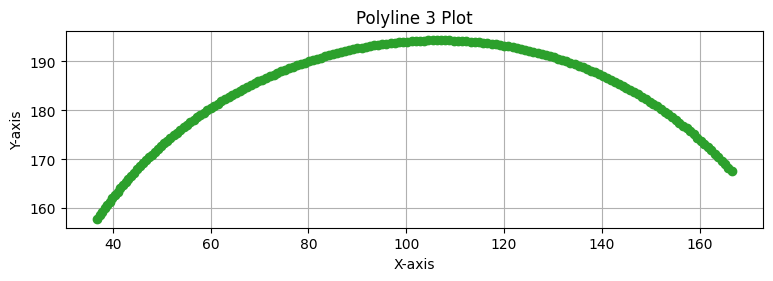

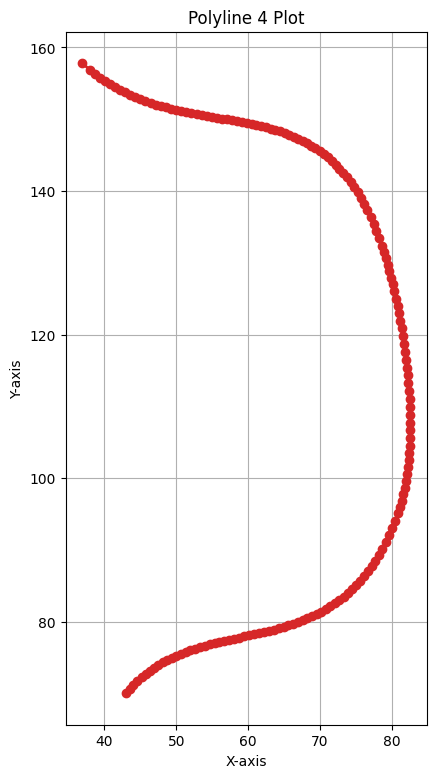

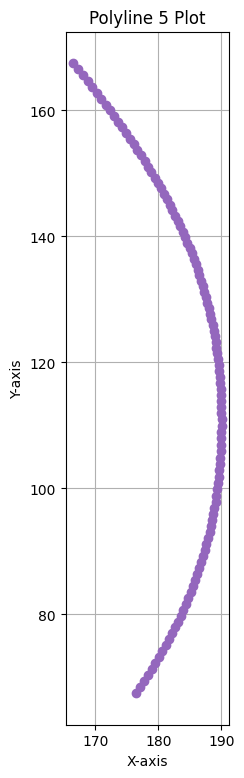

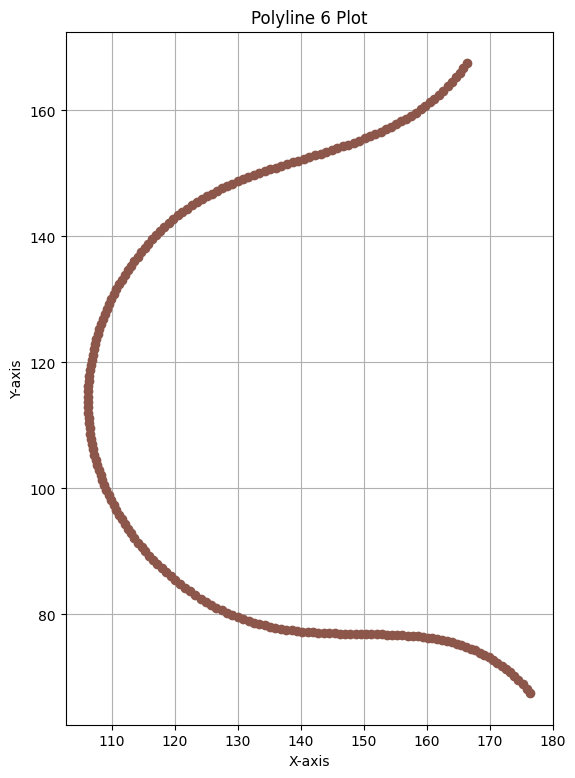

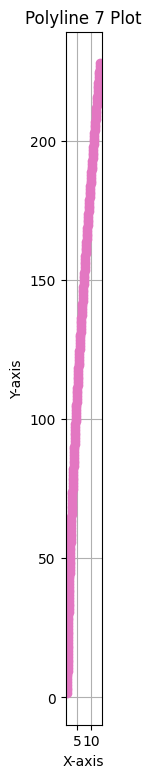

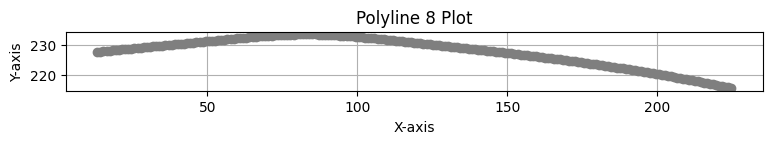

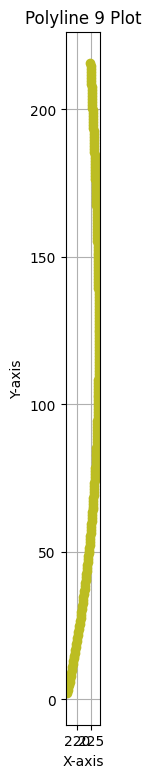

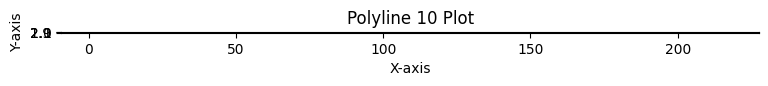

In [9]:
# Example usage
csv_filepath = 'problems/frag0.csv'  # Replace with your CSV file path

polylines = read_csv(csv_filepath)
plot_all_polylines(polylines)  # Plot all polylines with different colors
plot_individual_polylines(polylines)  # Plot each polyline separately

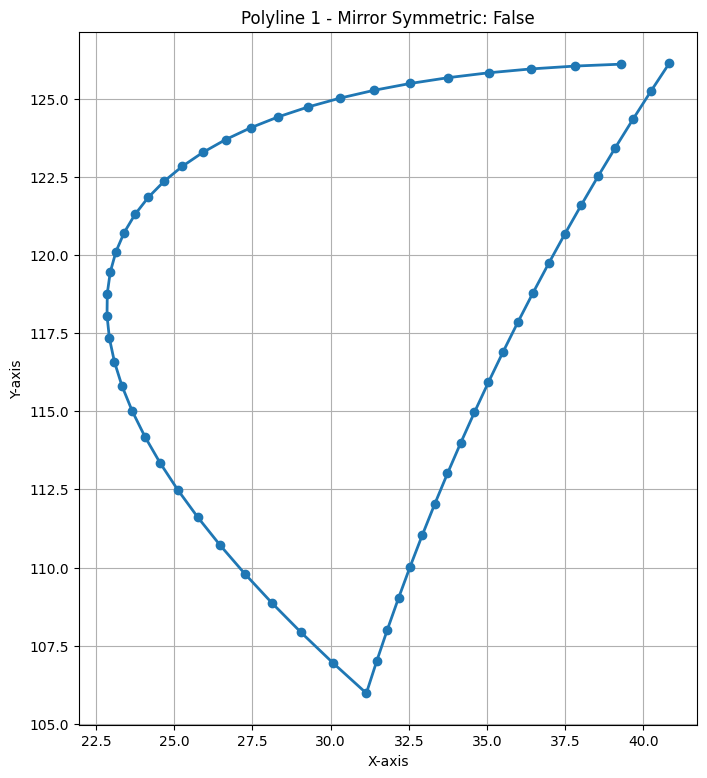

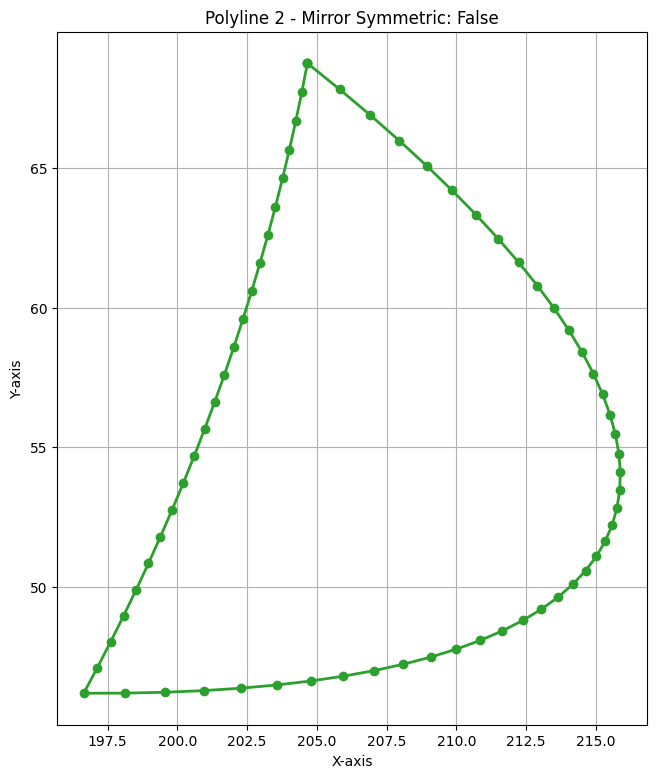

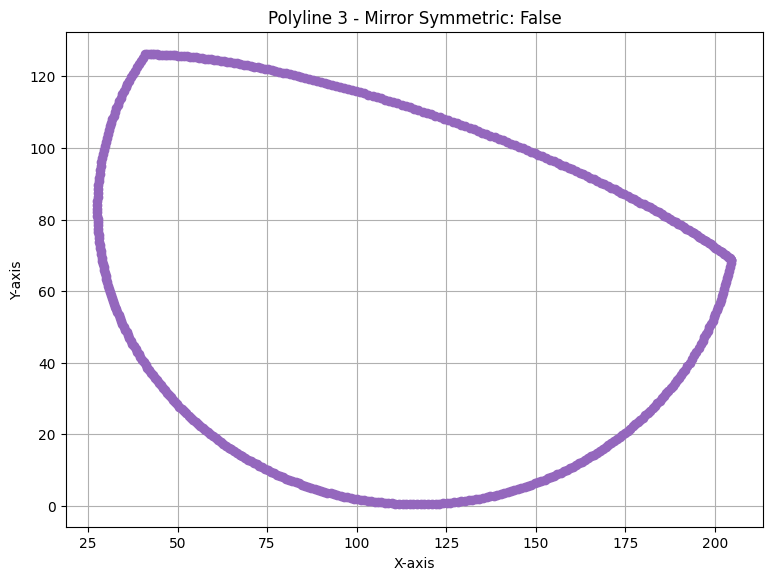

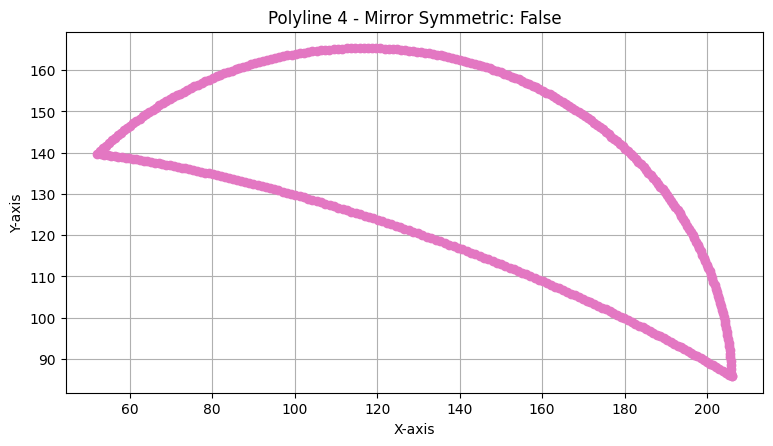

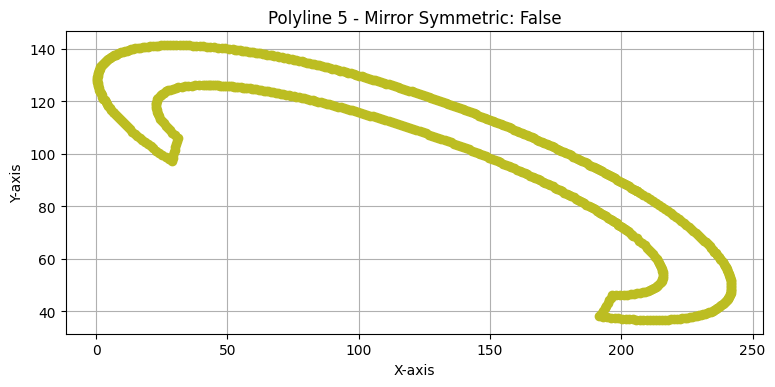

Polyline 1 is mirror symmetric: False
Polyline 2 is mirror symmetric: False
Polyline 3 is mirror symmetric: False
Polyline 4 is mirror symmetric: False
Polyline 5 is mirror symmetric: False


In [10]:
# Example usage
csv_filepath = 'problems/occlusion2.csv'  

polylines = read_csv(csv_filepath)
results = plot_and_check_mirror_symmetry(polylines)

# Print results
for idx, (polyline, symmetric) in enumerate(results):
    print(f"Polyline {idx + 1} is mirror symmetric: {symmetric}")

In [11]:
# Example usage
csv_filepath = 'problems/frag0.csv'  # Replace with your CSV file path

# Automatically create SVG file name based on the CSV file name
svg_filepath = os.path.splitext(csv_filepath)[0] + '.svg'

polylines = read_csv(csv_filepath)
polylines_to_svg(polylines, svg_filepath)

print(f"SVG file created: {svg_filepath}")


SVG file created: problems/frag0.svg
